In [3]:
!pip install backtrader
!pip install ace_tools

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout, SimpleRNN
from tensorflow.keras.optimizers import Adam
import yfinance as yf
import backtrader as bt
from backtrader.feeds import YahooFinanceData
%matplotlib inline
from IPython.display import Image
import math
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


 Data Collection

In [5]:
# Define ticker symbol for S&P 500
ticker = '^GSPC'

# Getting data from Yahoo Finance Oct 1994 to Oct 2024
data = yf.download(ticker, start='2020-04-01', end='2024-04-30')

# Reseting index to get 'Date' column
data.reset_index(inplace=True)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Data Cleaning and Normalization

In [6]:
# Handling missing values
data.dropna(inplace=True)

# Normalize the 'Close' price
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))


Data Preprocessing

In [7]:
# dataset creation
def create_dataset(dataset, dates, look_back=60):
    X, Y, D = [], [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i, 0])
        Y.append(dataset[i, 0])
        D.append(dates[i])
# Corresponding date
    return np.array(X), np.array(Y), np.array(D)

look_back = 60
# Number of previous time steps to use as input variables

X, Y, D = create_dataset(scaled_data, data['Date'].values, look_back)


In [8]:
# Train-Test Split (80% training, 20% testing)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]
D_train, D_test = D[:split], D[split:]

# Reshape data for models
# For LSTM and RNN (samples, time steps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# For CNN (samples, time steps, features)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


Model Building and Training

LSTM

In [9]:
# Builig LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(60, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
model_lstm.add(LSTM(60))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, Y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
25/25 [==============================] - 3s 31ms/step - loss: 0.0592
Epoch 2/10
25/25 [==============================] - 1s 29ms/step - loss: 0.0033
Epoch 3/10
25/25 [==============================] - 1s 35ms/step - loss: 0.0019
Epoch 4/10
25/25 [==============================] - 1s 33ms/step - loss: 0.0017
Epoch 5/10
25/25 [==============================] - 1s 34ms/step - loss: 0.0014
Epoch 6/10
25/25 [==============================] - 1s 32ms/step - loss: 0.0013
Epoch 7/10
25/25 [==============================] - 1s 32ms/step - loss: 0.0013
Epoch 8/10
25/25 [==============================] - 1s 39ms/step - loss: 0.0012
Epoch 9/10
25/25 [==============================] - 1s 31ms/step - loss: 0.0012
Epoch 10/10
25/25 [==============================] - 1s 32ms/step - loss: 0.0013


 CNN Model

In [10]:
#Building CNN Model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam', loss='mean_squared_error')
model_cnn.fit(X_train_cnn, Y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
25/25 [==============================] - 1s 3ms/step - loss: 0.0279
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 9/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0013


RNN Model

In [11]:
#Building RNN Model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(60, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
model_rnn.add(SimpleRNN(60))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.fit(X_train_lstm, Y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
25/25 [==============================] - 1s 14ms/step - loss: 0.1213
Epoch 2/10
25/25 [==============================] - 0s 15ms/step - loss: 0.0027
Epoch 3/10
25/25 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 4/10
25/25 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 5/10
25/25 [==============================] - 0s 12ms/step - loss: 0.0013
Epoch 6/10
25/25 [==============================] - 0s 12ms/step - loss: 0.0012
Epoch 7/10
25/25 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 8/10
25/25 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 9/10
25/25 [==============================] - 0s 12ms/step - loss: 0.0010
Epoch 10/10
25/25 [==============================] - 0s 11ms/step - loss: 0.0010


Hybrid LSTM + CNN

In [12]:
# Build First Hybrid Model LSTM+CNN
model_hybrid_lstm_cnn = Sequential()
model_hybrid_lstm_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1],1)))
model_hybrid_lstm_cnn.add(MaxPooling1D(pool_size=2))
model_hybrid_lstm_cnn.add(LSTM(60))
model_hybrid_lstm_cnn.add(Dense(1))
model_hybrid_lstm_cnn.compile(optimizer='adam', loss='mean_squared_error')
model_hybrid_lstm_cnn.fit(X_train_cnn, Y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
25/25 [==============================] - 2s 8ms/step - loss: 0.0405
Epoch 2/10
25/25 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 4/10
25/25 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 5/10
25/25 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 6/10
25/25 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 7/10
25/25 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 8/10
25/25 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 9/10
25/25 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 10/10
25/25 [==============================] - 0s 10ms/step - loss: 0.0012


Hybrid LSTM + RNN

In [13]:
#Build Hybrid LSTM+RNN
model_hybrid_lstm_rnn = Sequential()
model_hybrid_lstm_rnn.add(LSTM(60, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
model_hybrid_lstm_rnn.add(SimpleRNN(60))
model_hybrid_lstm_rnn.add(Dense(1))
model_hybrid_lstm_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_hybrid_lstm_rnn.fit(X_train_lstm, Y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
25/25 [==============================] - 2s 19ms/step - loss: 0.0151
Epoch 2/10
25/25 [==============================] - 0s 19ms/step - loss: 0.0024
Epoch 3/10
25/25 [==============================] - 0s 20ms/step - loss: 0.0017
Epoch 4/10
25/25 [==============================] - 0s 19ms/step - loss: 0.0016
Epoch 5/10
25/25 [==============================] - 0s 19ms/step - loss: 0.0014
Epoch 6/10
25/25 [==============================] - 0s 19ms/step - loss: 0.0013
Epoch 7/10
25/25 [==============================] - 0s 20ms/step - loss: 0.0014
Epoch 8/10
25/25 [==============================] - 1s 20ms/step - loss: 0.0012
Epoch 9/10
25/25 [==============================] - 0s 19ms/step - loss: 0.0013
Epoch 10/10
25/25 [==============================] - 0s 19ms/step - loss: 0.0014


Model Predictions and Evaluation

In [14]:
# Function to invert scaling
def invert_scaling(scaled_data):
    return scaler.inverse_transform(scaled_data)

# Function to calculate evaluation metrics
def calculate_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    mape = mean_absolute_percentage_error(actual, predicted)
    # Directional Accuracy
    actual_direction = np.sign(np.diff(actual, axis=0))
    predicted_direction = np.sign(np.diff(predicted, axis=0))
    directional_accuracy = np.mean(actual_direction == predicted_direction) * 100
    return mse, mae, mape, directional_accuracy


# LSTM Model Evaluation
# Make predictions
predictions_lstm = model_lstm.predict(X_test_lstm)
predictions_lstm = invert_scaling(predictions_lstm)
Y_test_actual = invert_scaling(Y_test.reshape(-1, 1))

# Calculating metrics
mse_lstm, mae_lstm, mape_lstm, acc_lstm = calculate_metrics(Y_test_actual, predictions_lstm)
print('LSTM Evaluation Metrics:')
print('MSE:', mse_lstm)
print('MAE:', mae_lstm)
print('MAPE:', mape_lstm)
print('Directional Accuracy:', acc_lstm, '%')


# Predictions plots with dates
def plot_predictions(dates, actual, predicted, title):
    plt.figure(figsize=(12,6))
    plt.plot(dates, actual, color='blue', label='Actual Stock Price')
    plt.plot(dates, predicted, color='red', label='Predicted Stock Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()


7/7 [==============================] - 1s 7ms/step
LSTM Evaluation Metrics:
MSE: 18571.990019922403
MAE: 119.52728586098583
MAPE: 0.02505839490340165
Directional Accuracy: 52.84974093264248 %


LSTM Model Evaluation

7/7 [==============================] - 0s 8ms/step
LSTM Evaluation Metrics:
MSE: 18571.990019922403
MAE: 119.52728586098583
MAPE: 0.02505839490340165
Directional Accuracy: 52.84974093264248 %


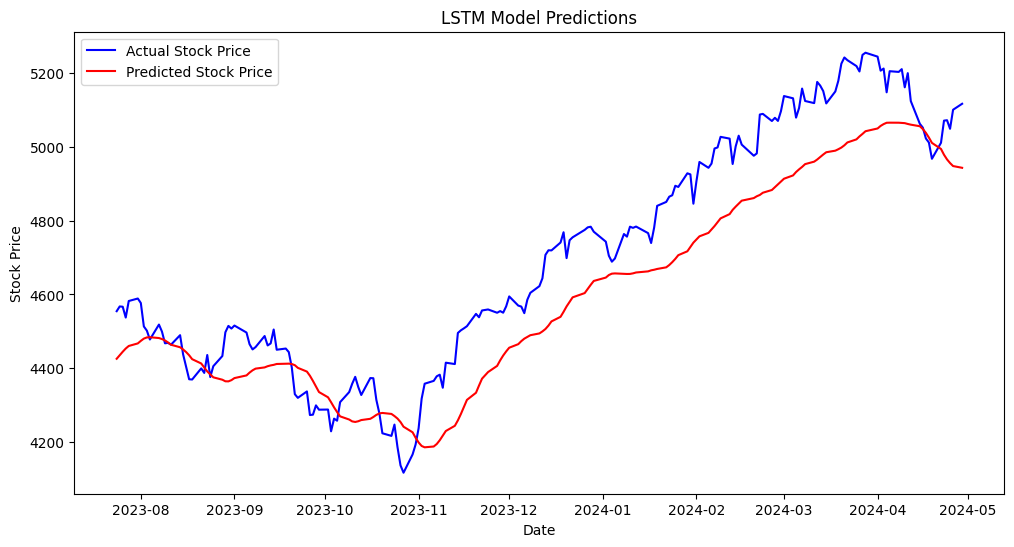

In [15]:
# Make predictions
predictions_lstm = model_lstm.predict(X_test_lstm)
predictions_lstm = invert_scaling(predictions_lstm)
Y_test_actual = invert_scaling(Y_test.reshape(-1, 1))

# Calculate metrics
mse_lstm, mae_lstm, mape_lstm, acc_lstm = calculate_metrics(Y_test_actual, predictions_lstm)
print('LSTM Evaluation Metrics:')
print('MSE:', mse_lstm)
print('MAE:', mae_lstm)
print('MAPE:', mape_lstm)
print('Directional Accuracy:', acc_lstm, '%')

# Plot predictions
plot_predictions(D_test, Y_test_actual, predictions_lstm, 'LSTM Model Predictions')


CNN Model Evaluation

7/7 [==============================] - 0s 1ms/step
CNN Evaluation Metrics:
MSE: 7490.550873274656
MAE: 73.80690238402062
MAPE: 0.015888015772900107
Directional Accuracy: 56.476683937823836 %


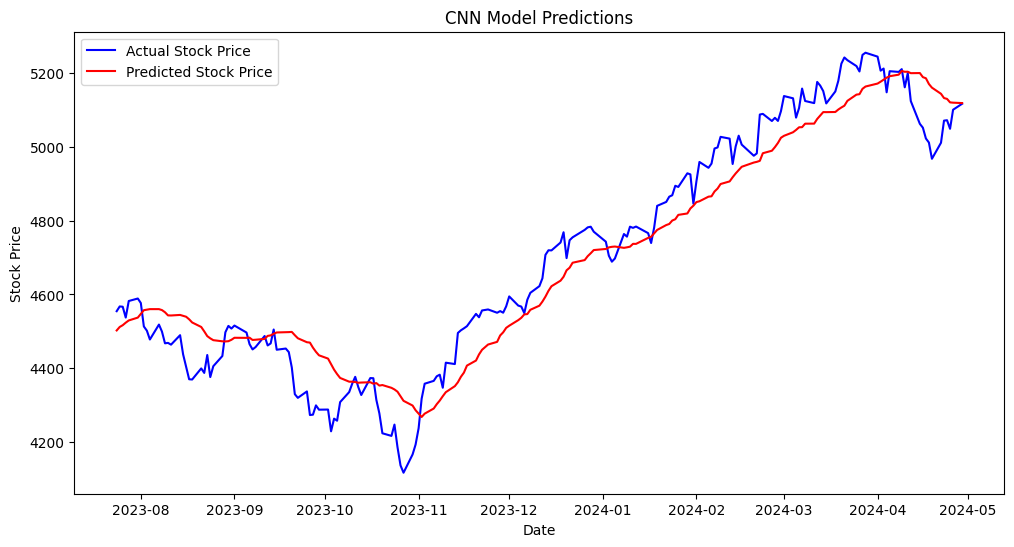

In [16]:
# Make predictions
predictions_cnn = model_cnn.predict(X_test_cnn)
predictions_cnn = invert_scaling(predictions_cnn)

# Calculate metrics
mse_cnn, mae_cnn, mape_cnn, acc_cnn = calculate_metrics(Y_test_actual, predictions_cnn)
print('CNN Evaluation Metrics:')
print('MSE:', mse_cnn)
print('MAE:', mae_cnn)
print('MAPE:', mape_cnn)
print('Directional Accuracy:', acc_cnn, '%')

# Plot predictions
plot_predictions(D_test, Y_test_actual, predictions_cnn, 'CNN Model Predictions')


RNN Model Evaluation

7/7 [==============================] - 0s 3ms/step
RNN Evaluation Metrics:
MSE: 29846.98044277958
MAE: 151.87187902706185
MAPE: 0.03147981622142266
Directional Accuracy: 55.95854922279793 %


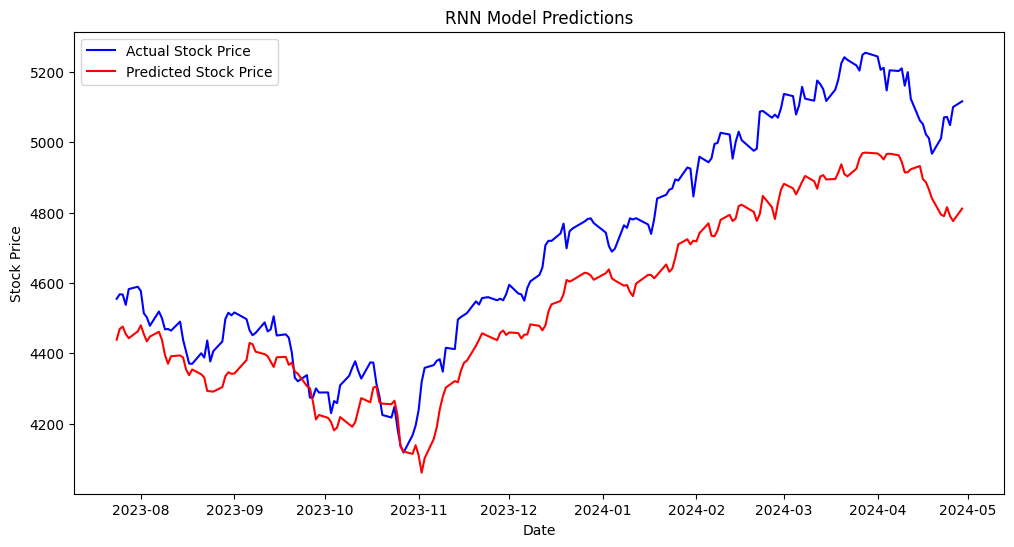

In [17]:
# Make predictions
predictions_rnn = model_rnn.predict(X_test_lstm)
predictions_rnn = invert_scaling(predictions_rnn)

# Calculate metrics
mse_rnn, mae_rnn, mape_rnn, acc_rnn = calculate_metrics(Y_test_actual, predictions_rnn)
print('RNN Evaluation Metrics:')
print('MSE:', mse_rnn)
print('MAE:', mae_rnn)
print('MAPE:', mape_rnn)
print('Directional Accuracy:', acc_rnn, '%')

# Plot predictions
plot_predictions(D_test, Y_test_actual, predictions_rnn, 'RNN Model Predictions')


Hybrid LSTM + CNN Model Evaluation

7/7 [==============================] - 0s 3ms/step
Hybrid LSTM+CNN Evaluation Metrics:
MSE: 7446.905419769975
MAE: 75.41619180895619
MAPE: 0.01610812366006298
Directional Accuracy: 54.40414507772021 %


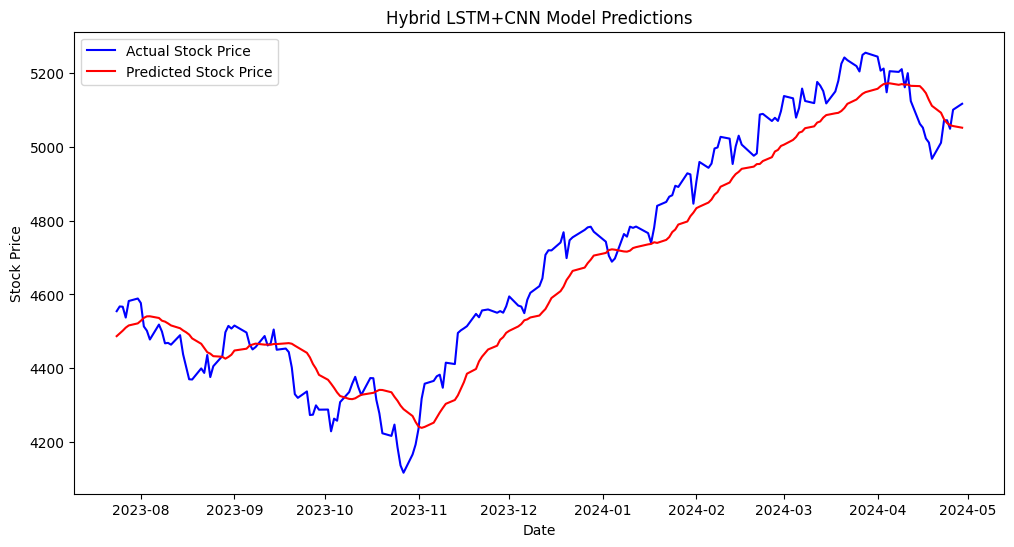

In [18]:
# Make predictions
predictions_hybrid_lstm_cnn = model_hybrid_lstm_cnn.predict(X_test_cnn)
predictions_hybrid_lstm_cnn = invert_scaling(predictions_hybrid_lstm_cnn)

# Calculate metrics
mse_hybrid_lstm_cnn, mae_hybrid_lstm_cnn, mape_hybrid_lstm_cnn, acc_hybrid_lstm_cnn = calculate_metrics(Y_test_actual, predictions_hybrid_lstm_cnn)
print('Hybrid LSTM+CNN Evaluation Metrics:')
print('MSE:', mse_hybrid_lstm_cnn)
print('MAE:', mae_hybrid_lstm_cnn)
print('MAPE:', mape_hybrid_lstm_cnn)
print('Directional Accuracy:', acc_hybrid_lstm_cnn, '%')

# Plot predictions
plot_predictions(D_test, Y_test_actual, predictions_hybrid_lstm_cnn, 'Hybrid LSTM+CNN Model Predictions')


Hybrid LSTM + RNN Model Evaluation

7/7 [==============================] - 0s 5ms/step
Hybrid LSTM+RNN Evaluation Metrics:
MSE: 26480.879766818176
MAE: 145.0695221891108
MAPE: 0.03030129752242603
Directional Accuracy: 52.84974093264248 %


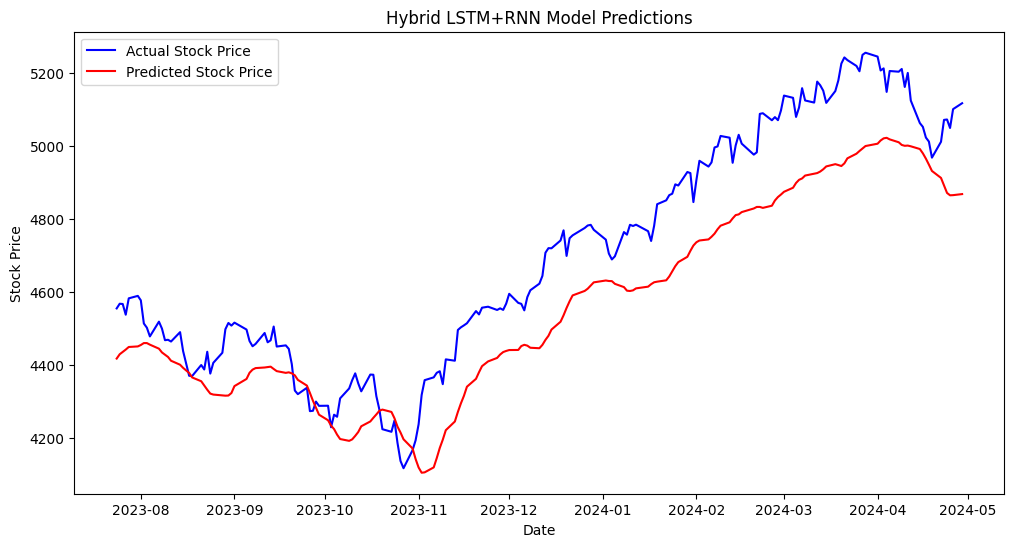

In [19]:
# Make predictions
predictions_hybrid_lstm_rnn = model_hybrid_lstm_rnn.predict(X_test_lstm)
predictions_hybrid_lstm_rnn = invert_scaling(predictions_hybrid_lstm_rnn)

# Calculate metrics
mse_hybrid_lstm_rnn, mae_hybrid_lstm_rnn, mape_hybrid_lstm_rnn, acc_hybrid_lstm_rnn = calculate_metrics(Y_test_actual, predictions_hybrid_lstm_rnn)
print('Hybrid LSTM+RNN Evaluation Metrics:')
print('MSE:', mse_hybrid_lstm_rnn)
print('MAE:', mae_hybrid_lstm_rnn)
print('MAPE:', mape_hybrid_lstm_rnn)
print('Directional Accuracy:', acc_hybrid_lstm_rnn, '%')

# Plot predictions
plot_predictions(D_test, Y_test_actual, predictions_hybrid_lstm_rnn, 'Hybrid LSTM+RNN Model Predictions')


Compile Evaluation Metrics

In [20]:
# Compile results into a DataFrame
results = pd.DataFrame({
    'Model': ['LSTM', 'CNN', 'RNN', 'Hybrid LSTM+CNN', 'Hybrid LSTM+RNN'],
    'MSE': [mse_lstm, mse_cnn, mse_rnn, mse_hybrid_lstm_cnn, mse_hybrid_lstm_rnn],
    'MAE': [mae_lstm, mae_cnn, mae_rnn, mae_hybrid_lstm_cnn, mae_hybrid_lstm_rnn],
    'MAPE': [mape_lstm, mape_cnn, mape_rnn, mape_hybrid_lstm_cnn, mape_hybrid_lstm_rnn],
    'Directional Accuracy (%)': [acc_lstm, acc_cnn, acc_rnn, acc_hybrid_lstm_cnn, acc_hybrid_lstm_rnn]
})

# Format MSE to smaller numbers (e.g., 0.00215)
results['MSE'] = results['MSE'].apply(lambda x: '{:.5f}'.format(x))

print(results)


             Model          MSE         MAE      MAPE  \
0             LSTM  18571.99002  119.527286  0.025058   
1              CNN   7490.55087   73.806902  0.015888   
2              RNN  29846.98044  151.871879  0.031480   
3  Hybrid LSTM+CNN   7446.90542   75.416192  0.016108   
4  Hybrid LSTM+RNN  26480.87977  145.069522  0.030301   

   Directional Accuracy (%)  
0                 52.849741  
1                 56.476684  
2                 55.958549  
3                 54.404145  
4                 52.849741  


Automated Trading System

 Backtesting Function

In [21]:
def backtest_strategy(dates, predictions, actual_prices, strategy_type, initial_investment=10000):
    investment = initial_investment
    positions = 0  # Number of shares held
    portfolio_values = []
    returns = []
    buy_dates = []
    sell_dates = []

    for i in range(len(predictions)-1):
        # Strategy Logic
        if strategy_type == 'swing':
            # Buy if predicted price is higher than current and not already holding
            if predictions[i+1] > actual_prices[i] and positions == 0:
                positions = investment / actual_prices[i]
                investment = 0
                buy_dates.append(dates[i])
            # Sell if predicted price is lower than current and holding
            elif predictions[i+1] < actual_prices[i] and positions > 0:
                investment = positions * actual_prices[i]
                positions = 0
                sell_dates.append(dates[i])
        elif strategy_type == 'long':
            # Buy and hold for the entire period
            if i == 0:
                positions = investment / actual_prices[i]
                investment = 0
                buy_dates.append(dates[i])

        # Calculate portfolio value
        current_value = investment + positions * actual_prices[i]
        portfolio_values.append(current_value)

        # Calculate daily return
        if i > 0:
            daily_return = (portfolio_values[-1] - portfolio_values[-2]) / portfolio_values[-2]
            returns.append(daily_return)

    # Final Portfolio Value
    final_value = investment + positions * actual_prices[-1]
    roi = (final_value - initial_investment) / initial_investment * 100

    # Calculate Sharpe Ratio
    returns = np.array(returns)
    sharpe_ratio = np.sqrt(252) * (np.mean(returns)) / np.std(returns) if np.std(returns) != 0 else 0

    return roi, sharpe_ratio, portfolio_values, buy_dates, sell_dates


Backtest Swing Trading Strategy with LSTM Predictions

In [22]:
roi_lstm_swing, sharpe_lstm_swing, portfolio_values_lstm_swing, buy_dates_lstm_swing, sell_dates_lstm_swing = backtest_strategy(
    D_test, predictions_lstm.flatten(), Y_test_actual.flatten(), 'swing', initial_investment=10000)

print('LSTM Swing Trading ROI: {:.2f}%'.format(roi_lstm_swing))
print('LSTM Swing Trading Sharpe Ratio: {:.2f}'.format(sharpe_lstm_swing))


LSTM Swing Trading ROI: -1.55%
LSTM Swing Trading Sharpe Ratio: -0.35


Backtest Long/Position Trading Strategy with LSTM Predictions

In [23]:
roi_lstm_long, sharpe_lstm_long, portfolio_values_lstm_long, buy_dates_lstm_long, sell_dates_lstm_long = backtest_strategy(
    D_test, predictions_lstm.flatten(), Y_test_actual.flatten(), 'long', initial_investment=10000)

print('LSTM Long Trading ROI: {:.2f}%'.format(roi_lstm_long))
print('LSTM Long Trading Sharpe Ratio: {:.2f}'.format(sharpe_lstm_long))


LSTM Long Trading ROI: 12.33%
LSTM Long Trading Sharpe Ratio: 1.32


Plot Buy/Sell Signals

In [24]:
def plot_trading_signals(dates, predictions, actual_prices, buy_dates, sell_dates, strategy_type):
    plt.figure(figsize=(12,6))
    plt.plot(dates, actual_prices, label='Actual Stock Price', alpha=0.5)
    plt.scatter(buy_dates, actual_prices[np.isin(dates, buy_dates)], label='Buy Signal', marker='^', color='green')
    plt.scatter(sell_dates, actual_prices[np.isin(dates, sell_dates)], label='Sell Signal', marker='v', color='red')
    plt.title(f'{strategy_type.capitalize()} Trading Signals')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()


 Plot Swing Trading Signals

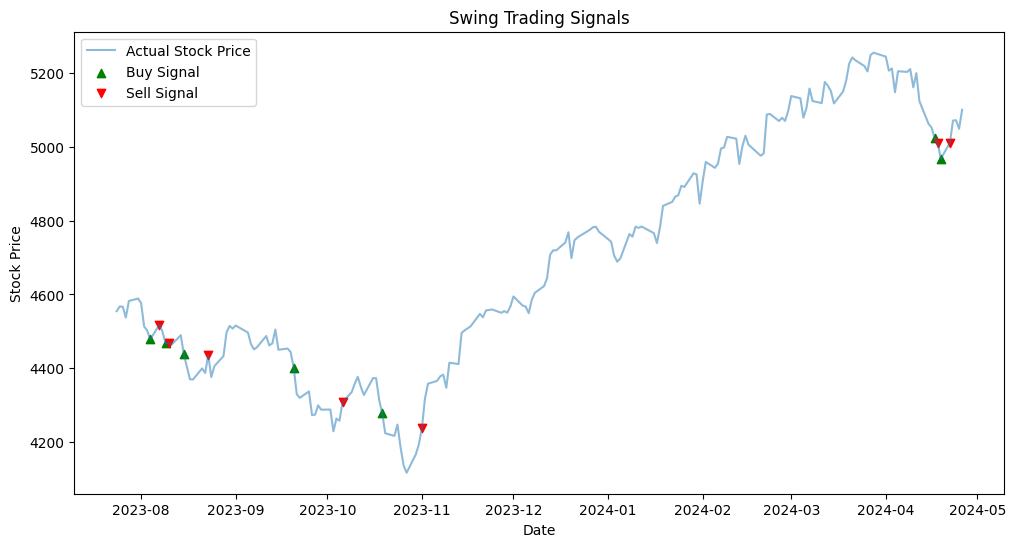

In [25]:
plot_trading_signals(D_test[:-1], predictions_lstm[:-1], Y_test_actual[:-1], buy_dates_lstm_swing, sell_dates_lstm_swing, 'swing')


Plot Long Trading Signals

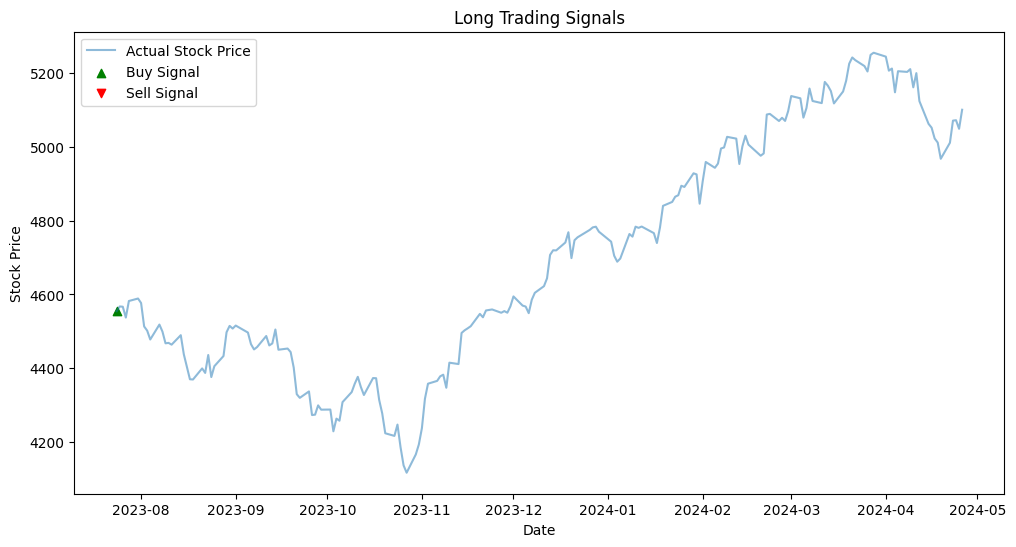

In [26]:
plot_trading_signals(D_test[:-1], predictions_lstm[:-1], Y_test_actual[:-1], buy_dates_lstm_long, sell_dates_lstm_long, 'long')


Portfolio Value Over Time Plot

In [27]:
def plot_portfolio_value(dates, portfolio_values, strategy_type):
    plt.figure(figsize=(12,6))
    plt.plot(dates[:-1], portfolio_values, label='Portfolio Value')
    plt.title(f'{strategy_type.capitalize()} Trading Portfolio Value Over Time')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value ($)')
    plt.legend()
    plt.show()


Plot Swing Trading Portfolio Value

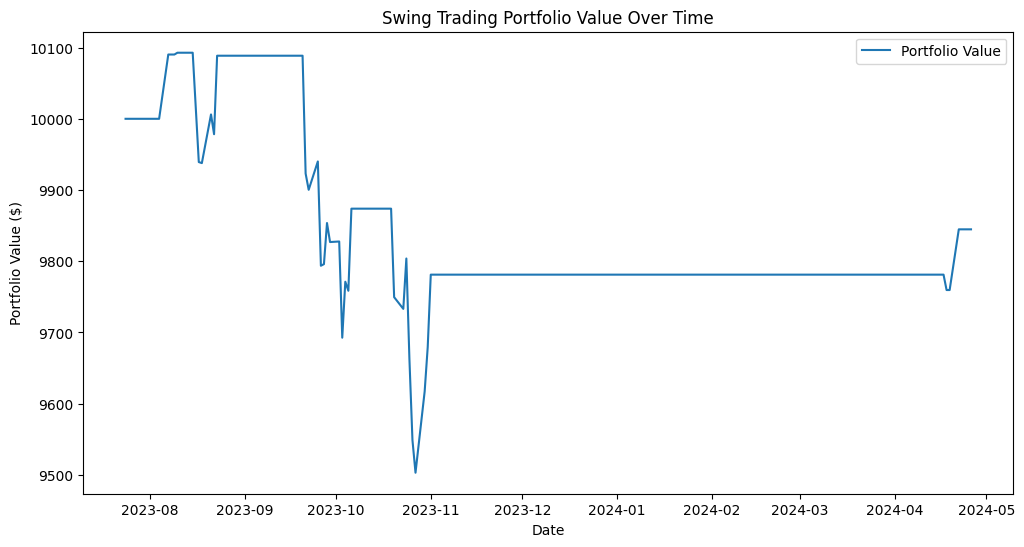

In [28]:
plot_portfolio_value(D_test, portfolio_values_lstm_swing, 'swing')


Plot Long Trading Portfolio Value

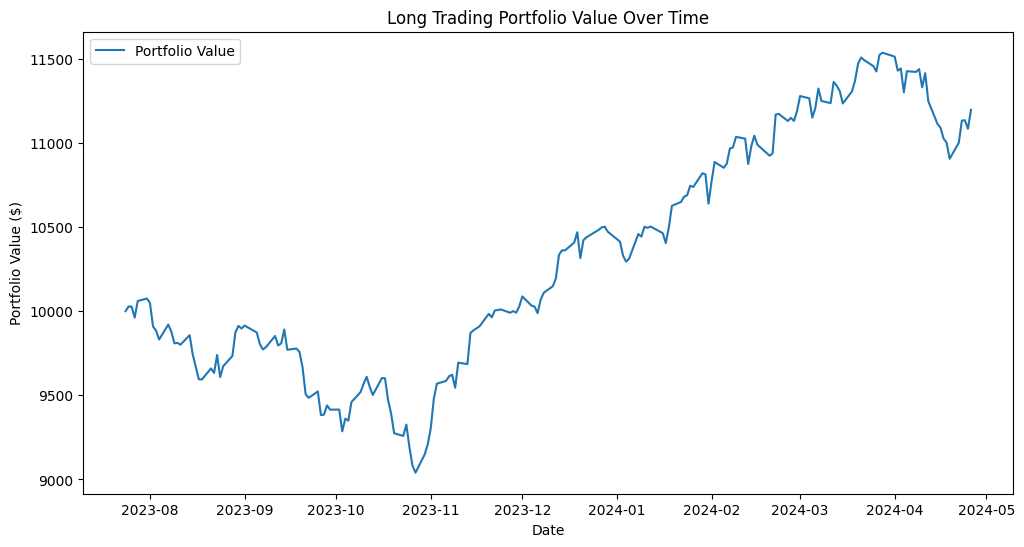

In [29]:
plot_portfolio_value(D_test, portfolio_values_lstm_long, 'long')


Final Evaluation Metrics Summary

In [30]:
# Merge model evaluation and trading strategy results
evaluation_summary = pd.DataFrame({
    'Model': ['LSTM'],
    'MSE': [mse_lstm],
    'MAE': [mae_lstm],
    'MAPE': [mape_lstm],
    'Directional Accuracy (%)': [acc_lstm],
    'Swing Trading ROI (%)': [roi_lstm_swing],
    'Swing Trading Sharpe Ratio': [sharpe_lstm_swing],
    'Long Trading ROI (%)': [roi_lstm_long],
    'Long Trading Sharpe Ratio': [sharpe_lstm_long]
})

# Format MSE to smaller numbers
evaluation_summary['MSE'] = evaluation_summary['MSE'].apply(lambda x: '{:.5f}'.format(x))

print(evaluation_summary)


  Model          MSE         MAE      MAPE  Directional Accuracy (%)  \
0  LSTM  18571.99002  119.527286  0.025058                 52.849741   

   Swing Trading ROI (%)  Swing Trading Sharpe Ratio  Long Trading ROI (%)  \
0              -1.552009                   -0.347852             12.328741   

   Long Trading Sharpe Ratio  
0                   1.319491  
